<a href="https://colab.research.google.com/github/ichrafmoula/Sentiment-analysis-with-LSTM/blob/main/sentiment_analysis_imdb_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import all **

In [34]:
import pandas as pd    # to load dataset
import numpy as np     # for mathematic equation
from nltk.corpus import stopwords   # to get collection of stopwords
from sklearn.model_selection import train_test_split       # for splitting dataset
from tensorflow.keras.preprocessing.text import Tokenizer  # to encode text to int
from tensorflow.keras.preprocessing.sequence import pad_sequences   # to do padding or truncating
from tensorflow.keras.models import Sequential     # the model
from tensorflow.keras.layers import Embedding, LSTM, Dense # layers of the architecture
from tensorflow.keras.callbacks import ModelCheckpoint   # save model
from tensorflow.keras.models import load_model   # load saved model
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Load the dataset**

In [35]:
#load the Google Play app reviews dataset
!gdown --id 1S6qMioqPJjyBLpLVz4gmRTnJHnjitnuV
!gdown --id 1zdmewp7ayS4js4VtrJEHzAheSW-5NBZv

Downloading...
From: https://drive.google.com/uc?id=1S6qMioqPJjyBLpLVz4gmRTnJHnjitnuV
To: /content/apps.csv
100% 134k/134k [00:00<00:00, 77.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zdmewp7ayS4js4VtrJEHzAheSW-5NBZv
To: /content/reviews.csv
100% 7.17M/7.17M [00:00<00:00, 160MB/s]


In [36]:
data = pd.read_csv("reviews.csv",engine='python' ,encoding='utf-8' ,error_bad_lines=False)
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,Andrew Thomas,https://lh3.googleusercontent.com/a-/AOh14GiHd...,Update: After getting a response from the deve...,1,21,4.17.0.3,2020-04-05 22:25:57,"According to our TOS, and the term you have ag...",2020-04-05 15:10:24,most_relevant,com.anydo
1,Craig Haines,https://lh3.googleusercontent.com/-hoe0kwSJgPQ...,Used it for a fair amount of time without any ...,1,11,4.17.0.3,2020-04-04 13:40:01,It sounds like you logged in with a different ...,2020-04-05 15:11:35,most_relevant,com.anydo
2,steven adkins,https://lh3.googleusercontent.com/a-/AOh14GiXw...,Your app sucks now!!!!! Used to be good but no...,1,17,4.17.0.3,2020-04-01 16:18:13,This sounds odd! We are not aware of any issue...,2020-04-02 16:05:56,most_relevant,com.anydo
3,Lars Panzerbjørn,https://lh3.googleusercontent.com/a-/AOh14Gg-h...,"It seems OK, but very basic. Recurring tasks n...",1,192,4.17.0.2,2020-03-12 08:17:34,We do offer this option as part of the Advance...,2020-03-15 06:20:13,most_relevant,com.anydo
4,Scott Prewitt,https://lh3.googleusercontent.com/-K-X1-YsVd6U...,Absolutely worthless. This app runs a prohibit...,1,42,4.17.0.2,2020-03-14 17:41:01,We're sorry you feel this way! 90% of the app ...,2020-03-15 23:45:51,most_relevant,com.anydo


In [37]:
#Preview dataset

data = pd.read_csv('/content/IMDB Dataset.csv' , engine='python' ,encoding='utf-8' ,error_bad_lines=False)
print(data)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
22907  Set in Bam Margera's hometown of Westchester P...  positive
22908  To understand "Crash Course" in the right cont...  positive
22909  Shaggy, friendly yet frustrating film has the ...  negative
22910  I'm not really sure where to begin. From start...  negative
22911  There are few uplifting things to say about th...  negative

[22912 rows x 2 columns]


Skipping line 22914: unexpected end of data


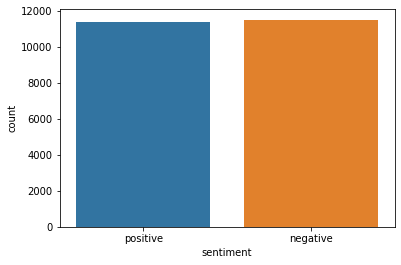

In [38]:
#the distribution of positive and negative sentiments in our dataset
import seaborn as sns

sns.countplot(x='sentiment', data=data)

# Data Preprocessing


In [39]:
#Declaring the english stop words
english_stops = set(stopwords.words('english'))
english_stops

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [40]:
def load_dataset(df):
    x_data = df['review']       # Reviews/Input
    y_data = df['sentiment']    # Sentiment/Output

    # PRE-PROCESS REVIEW
    x_data = x_data.replace({'<.*?>': ''}, regex = True)          # remove html tag
    x_data = x_data.replace({'[^A-Za-z]': ' '}, regex = True)     # remove non alphabet
    x_data = x_data.apply(lambda review: [w for w in review.split() if w not in english_stops])  # remove stop words
    x_data = x_data.apply(lambda review: [w.lower() for w in review])   # lower case
    
    # ENCODE SENTIMENT -> 0 & 1
    y_data = y_data.replace('positive', 1)
    y_data = y_data.replace('negative', 0)

    return x_data, y_data

x_data, y_data = load_dataset(data)
print(x_data, '\n')
print('Sentiment')
print(y_data)

0        [one, reviewers, mentioned, watching, oz, epis...
1        [a, wonderful, little, production, the, filmin...
2        [i, thought, wonderful, way, spend, time, hot,...
3        [basically, family, little, boy, jake, thinks,...
4        [petter, mattei, love, time, money, visually, ...
                               ...                        
22907    [set, bam, margera, hometown, westchester, pa,...
22908    [to, understand, crash, course, right, context...
22909    [shaggy, friendly, yet, frustrating, film, old...
22910    [i, really, sure, begin, from, start, finish, ...
22911    [there, uplifting, things, say, i, mention, ma...
Name: review, Length: 22912, dtype: object 

Sentiment
0        1
1        1
2        1
3        0
4        1
        ..
22907    1
22908    1
22909    0
22910    0
22911    0
Name: sentiment, Length: 22912, dtype: int64



# **Split Dataset**


In [41]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2)

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2)

print('Train Set')
print(x_train, '\n')
print(x_test, '\n')
print('Test Set')
print(y_train, '\n')
print(y_test)

Train Set
4147     [this, movie, gets, better, time, i, see, ther...
6973     [ed, harris, work, film, usual, standard, exce...
12084    [despite, new, york, setting, new, york, chara...
20264    [i, barely, find, words, express, utterly, utt...
3202     [despite, title, may, imply, pigs, is, pigs, s...
                               ...                        
21030    [watch, on, the, rhine, started, broadway, pla...
7447     [i, got, dvd, hardware, wars, shiny, new, pack...
9741     [jim, brown, stars, produces, tale, set, phili...
5603     [first, like, say, know, share, star, wars, fa...
9608     [a, must, see, film, great, dialogues, great, ...
Name: review, Length: 18329, dtype: object 

4258     [astonishing, screams, la, times, front, dvd, ...
11570    [i, waiting, since, last, october, see, film, ...
17493    [this, italian, movie, basically, soap, opera,...
12700    [typical, steven, seagal, fare, crap, the, plo...
7807     [so, reason, is, sort, vendetta, awesome, show...
 

In [43]:
#Function for getting the maximum review length, by calculating the mean of all the reviews length
def get_max_length():
    review_length = []
    for review in x_train:
        review_length.append(len(review))

    return int(np.ceil(np.mean(review_length)))

# Tokenize and Pad/Truncate Reviews

In [44]:
# ENCODE REVIEW
token = Tokenizer(lower=False)    # no need lower, because already lowered the data in load_data()
token.fit_on_texts(x_train)
x_train = token.texts_to_sequences(x_train)
x_test = token.texts_to_sequences(x_test)

max_length = get_max_length()

x_train = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')

total_words = len(token.word_index) + 1   # add 1 because of 0 padding

print('Encoded X Train\n', x_train, '\n')
print('Encoded X Test\n', x_test, '\n')
print('Maximum review length: ', max_length)

Encoded X Train
 [[   8    3  119 ...  380  239 2684]
 [1224 2314   73 ...    0    0    0]
 [ 378   82  732 ...    0    0    0]
 ...
 [1025 1710  311 ...    0    0    0]
 [  23    6   58 ...  459   59  739]
 [  39  111   14 ...    0    0    0]] 

Encoded X Test
 [[ 4453  4164   943 ...   433   367   602]
 [    1   947   136 ...     0     0     0]
 [    8   900     3 ...     0     0     0]
 ...
 [ 5357   292   403 ...     0     0     0]
 [ 3181   270   718 ...    97   162  1520]
 [  374   518  2652 ... 39465   256   392]] 

Maximum review length:  131


# Build Architecture/Model 

In [45]:
# ARCHITECTURE
from keras import metrics
from tensorflow.keras.models import Sequential     # the model
from tensorflow.keras.layers import Embedding, LSTM, Dense 
EMBED_DIM = 32
lstm_out = 64
model = Sequential()
model.add(Embedding(total_words, EMBED_DIM, input_length = max_length))
model.add(LSTM(lstm_out))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy', metrics.Recall(),metrics.Precision()]) 
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 131, 32)           2141472   
                                                                 
 lstm_2 (LSTM)               (None, 64)                24832     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,166,369
Trainable params: 2,166,369
Non-trainable params: 0
_________________________________________________________________
None


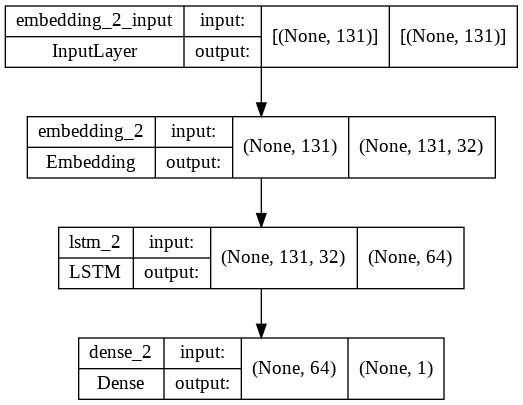

In [46]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Training

In [47]:
checkpoint = ModelCheckpoint(
    'models/LSTM.h5',
    monitor='accuracy',
    save_best_only=True,
    verbose=1
)

In [48]:
history = model.fit(x_train ,
                    y_train, 
                    validation_data=(x_test, y_test), 
                    epochs=10, 
                    batch_size=32, 
                    callbacks=[checkpoint])

Epoch 1/10
572/573 [============================>.] - ETA: 0s - loss: 0.6896 - accuracy: 0.5202 - recall_1: 0.7612 - precision_1: 0.5115
Epoch 1: accuracy improved from -inf to 0.52021, saving model to models/LSTM.h5
573/573 [==============================] - 28s 38ms/step - loss: 0.6896 - accuracy: 0.5202 - recall_1: 0.7604 - precision_1: 0.5115 - val_loss: 0.6894 - val_accuracy: 0.5664 - val_recall_1: 0.2198 - val_precision_1: 0.7135
Epoch 2/10
573/573 [==============================] - ETA: 0s - loss: 0.6424 - accuracy: 0.6377 - recall_1: 0.6183 - precision_1: 0.6401
Epoch 2: accuracy improved from 0.52021 to 0.63768, saving model to models/LSTM.h5
573/573 [==============================] - 21s 36ms/step - loss: 0.6424 - accuracy: 0.6377 - recall_1: 0.6183 - precision_1: 0.6401 - val_loss: 0.6668 - val_accuracy: 0.5767 - val_recall_1: 0.8142 - val_precision_1: 0.5515
Epoch 3/10
573/573 [==============================] - ETA: 0s - loss: 0.3744 - accuracy: 0.8442 - recall_1: 0.8555 - 

In [49]:
socres = model.evaluate(x_test , y_test , verbose=0)

print("Accuracy: %.2f%%" % (socres[1]*100))

Accuracy: 66.00%


In [50]:
accr = model.evaluate(x_train, y_train)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.4f}'.format(accr[0],accr[1]))

573/573 [==============================] - 8s 14ms/step - loss: 0.4888 - accuracy: 0.7608 - recall_1: 0.5393 - precision_1: 0.9628
Test set
  Loss: 0.489
  Accuracy: 0.7608


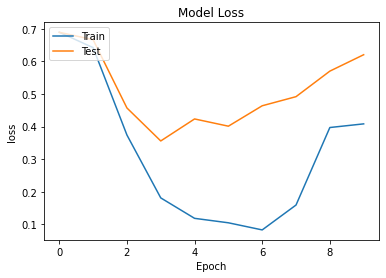

In [51]:
from matplotlib import pyplot as plt
plt.title('Model Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show();

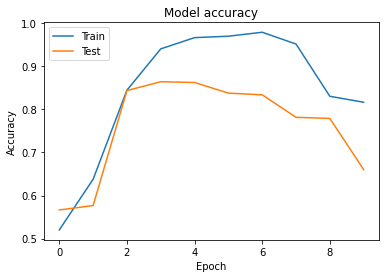

In [52]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

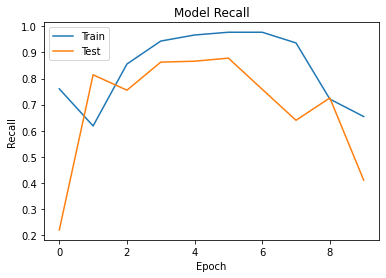

In [54]:
plt.plot(history.history['recall_1'])
plt.plot(history.history['val_recall_1'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

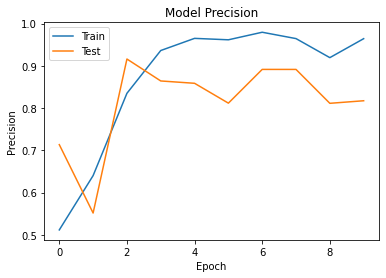

In [55]:
plt.plot(history.history['precision_1'])
plt.plot(history.history['val_precision_1'])
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [56]:
predictions_nn_train = model.predict(x_train)
predictions_nn_test = model.predict(x_test)
for i in range(len(predictions_nn_train)):
    if predictions_nn_train[i][0] < 0.5:
        predictions_nn_train[i][0] = 0
    else:
        predictions_nn_train[i][0] = 1
        
for i in range(len(predictions_nn_test)):
    if predictions_nn_test[i][0] < 0.5:
        predictions_nn_test[i][0] = 0
    else:
        predictions_nn_test[i][0] = 1
print('Train accuracy:', accuracy_score(y_train, predictions_nn_train))
print('Test accuracy', accuracy_score(y_test, predictions_nn_test))

Train accuracy: 0.7607616345681707
Test accuracy 0.660048003491163


In [57]:
# evaluate the model
train_acc = model.evaluate(x_train, y_train, verbose=0)
test_acc = model.evaluate(x_test , y_test, verbose=0)

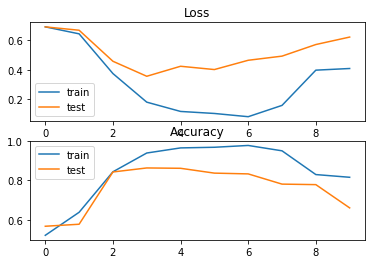

In [59]:
from matplotlib import pyplot

# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training

print('')
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

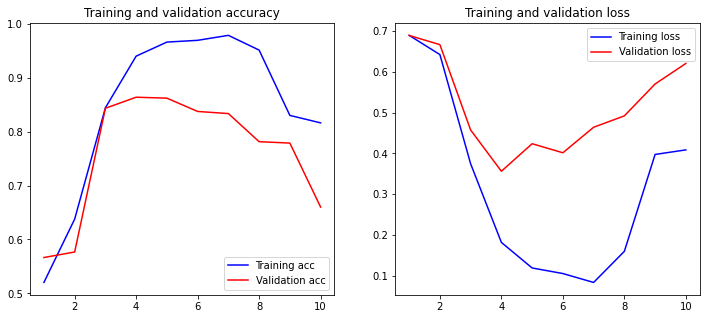

In [60]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Training acc')
plt.plot(x, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

# **TEST BILSTM**

In [62]:
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
model2 = Sequential()
model2.add(Embedding(total_words, 32, input_length = max_length))
model2.add(Bidirectional(LSTM(64)))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', metrics.Recall(),metrics.Precision()]) 

In [63]:
history2=model2.fit(x_train, y_train,
           batch_size=32,
           epochs=12,
           validation_data=[x_test, y_test])
print(history2.history['loss'])
print(history2.history['accuracy']) 

Epoch 1/12
573/573 [==============================] - 50s 73ms/step - loss: 0.4490 - accuracy: 0.7885 - recall_2: 0.8489 - precision_2: 0.7556 - val_loss: 0.3272 - val_accuracy: 0.8724 - val_recall_2: 0.8680 - val_precision_2: 0.8753
Epoch 2/12
573/573 [==============================] - 39s 68ms/step - loss: 0.2119 - accuracy: 0.9265 - recall_2: 0.9272 - precision_2: 0.9251 - val_loss: 0.3241 - val_accuracy: 0.8667 - val_recall_2: 0.8274 - val_precision_2: 0.8976
Epoch 3/12
573/573 [==============================] - 39s 68ms/step - loss: 0.1027 - accuracy: 0.9694 - recall_2: 0.9680 - precision_2: 0.9703 - val_loss: 0.3988 - val_accuracy: 0.8678 - val_recall_2: 0.8715 - val_precision_2: 0.8647
Epoch 4/12
573/573 [==============================] - 39s 67ms/step - loss: 0.0570 - accuracy: 0.9835 - recall_2: 0.9816 - precision_2: 0.9851 - val_loss: 0.4369 - val_accuracy: 0.8479 - val_recall_2: 0.7950 - val_precision_2: 0.8886
Epoch 5/12
573/573 [==============================] - 39s 67ms/s

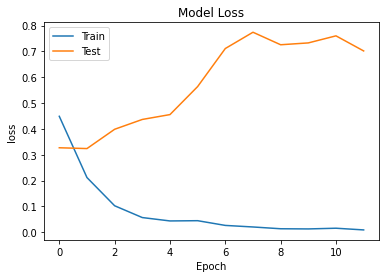

In [64]:
from matplotlib import pyplot as plt
plt.title('Model Loss')
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show();

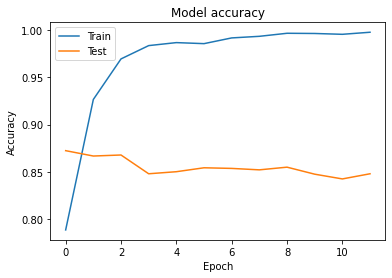

In [65]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

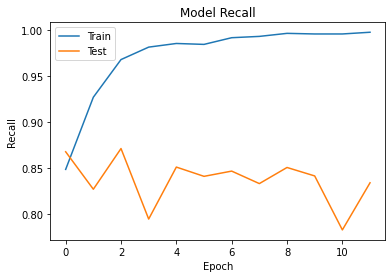

In [66]:
plt.plot(history2.history['recall_2'])
plt.plot(history2.history['val_recall_2'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

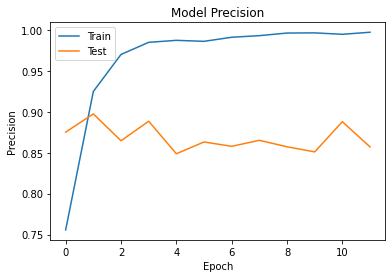

In [68]:
plt.plot(history2.history['precision_2'])
plt.plot(history2.history['val_precision_2'])
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show() 

In [69]:
predictions_nn_train = model2.predict(x_train)
predictions_nn_test = model2.predict(x_test)
for i in range(len(predictions_nn_train)):
    if predictions_nn_train[i][0] < 0.5:
        predictions_nn_train[i][0] = 0
    else:
        predictions_nn_train[i][0] = 1
        
for i in range(len(predictions_nn_test)):
    if predictions_nn_test[i][0] < 0.5:
        predictions_nn_test[i][0] = 0
    else:
        predictions_nn_test[i][0] = 1
print('Train accuracy:', accuracy_score(y_train, predictions_nn_train))
print('Test accuracy', accuracy_score(y_test, predictions_nn_test))

Train accuracy: 0.9992361830978231
Test accuracy 0.8479162120881518


# Testing

In [ ]:
y_pred = model.predict_classes(x_test, batch_size = 128)

true = 0
for i, y in enumerate(y_test):
    if y == y_pred[i]:
        true += 1

print('Correct Prediction: {}'.format(true))
print('Wrong Prediction: {}'.format(len(y_pred) - true))
print('Accuracy: {}'.format(true/len(y_pred)*100))

# Load Saved Model

In [ ]:
loaded_model =load_model('/content/sample_data/models/LSTM.h5')




In [ ]:
review = str(input('Movie Review: '))

In [ ]:
# Pre-process input
regex = re.compile(r'[^a-zA-Z\s]')
review = regex.sub('', review)
print('Cleaned: ', review)

words = review.split(' ')
filtered = [w for w in words if w not in english_stops]
filtered = ' '.join(filtered)
filtered = [filtered.lower()]

print('Filtered: ', filtered)

In [ ]:
tokenize_words = token.texts_to_sequences(filtered)
tokenize_words = pad_sequences(tokenize_words, maxlen=max_length, padding='post', truncating='post')
print(tokenize_words)

In [ ]:
result = loaded_model.predict(tokenize_words)
print(result)

In [ ]:
if result >= 0.7:
    print('positive')
else:
    print('negative')